In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling as pp

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('30_Auto_theft.csv')
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946


In [4]:
pp.ProfileReport(df)

Number of variables,7
Number of observations,1865
Total Missing (%),2.9%
Total size in memory,102.1 KiB
Average record size in memory,56.0 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
df.describe()

,Year,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
count,1865.000000,1519.000000,1837.000000,1865.000000
mean,2005.564075,74.541145,297.927055,1029.431635
std,2.853598,270.195127,677.445512,2399.389932
min,2001.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,4.000000,7.000000
50%,2006.000000,2.000000,29.000000,80.000000
75%,2008.000000,27.000000,177.000000,521.000000
max,2010.000000,2985.000000,5453.000000,18605.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 7 columns):
Area_Name                        1865 non-null object
Year                             1865 non-null int64
Group_Name                       1865 non-null object
Sub_Group_Name                   1865 non-null object
Auto_Theft_Coordinated/Traced    1519 non-null float64
Auto_Theft_Recovered             1837 non-null float64
Auto_Theft_Stolen                1865 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 102.1+ KB


In [13]:
df.Group_Name.value_counts()

AT6-Total                                         344
AT1-Motor Cycles/ Scooters                        341
AT2-Motor Car/Taxi/Jeep                           331
AT5-Other Motor vehicles                          303
AT4-Goods carrying vehicles (Trucks/Tempo etc)    292
AT3-Buses                                         254
Name: Group_Name, dtype: int64

In [14]:
df.Group_Name = df.Group_Name.str.split("-").str[0]

In [15]:
rep = {"6. Total (Sum of 1-5 Above)":'Total',"1. Motor Cycles/ Scooters":'Motor Cycles',"2. Motor Car/Taxi/Jeep":'Motor Car',"5. Other Motor vehicles":"Other Vehicles"
      ,"4. Goods carrying vehicles (Trucks/Tempo etc)":"Goods carrying vehicles","3. Buses":"Buses"}
df.Sub_Group_Name.replace(rep,inplace=True)

In [16]:
df = df[df.Sub_Group_Name!='Total']

In [17]:
df=df.drop('Group_Name',axis=1)

In [18]:
df.head()

,Area_Name,Year,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,Motor Cycles,2.0,4.0,4
1,Andhra Pradesh,2001,Motor Cycles,136.0,1311.0,2725
2,Arunachal Pradesh,2001,Motor Cycles,0.0,21.0,27
3,Assam,2001,Motor Cycles,0.0,94.0,205
4,Bihar,2001,Motor Cycles,44.0,205.0,946


In [19]:
df.Sub_Group_Name.value_counts()

Motor Cycles               341
Motor Car                  331
Other Vehicles             303
Goods carrying vehicles    292
Buses                      254
Name: Sub_Group_Name, dtype: int64

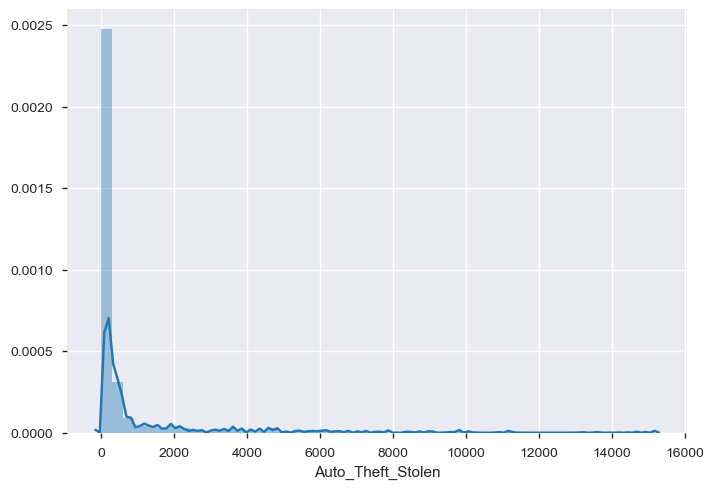

In [20]:
sns.distplot(df.Auto_Theft_Stolen)

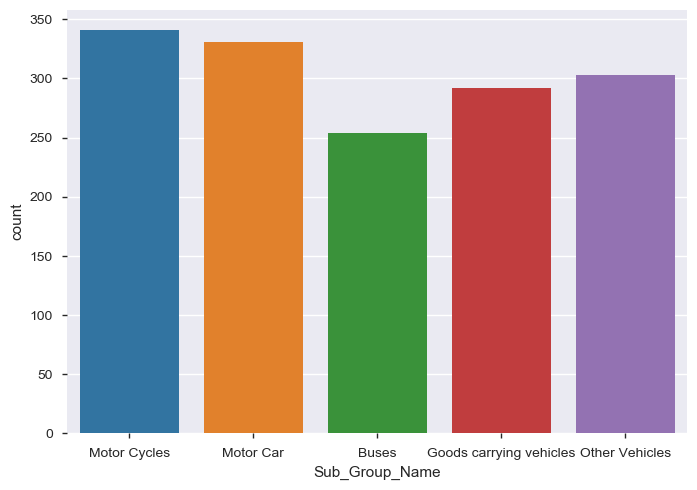

In [21]:
sns.countplot(df.Sub_Group_Name)

**Motor Cycles/Scooters are most stolen category of vehicles**

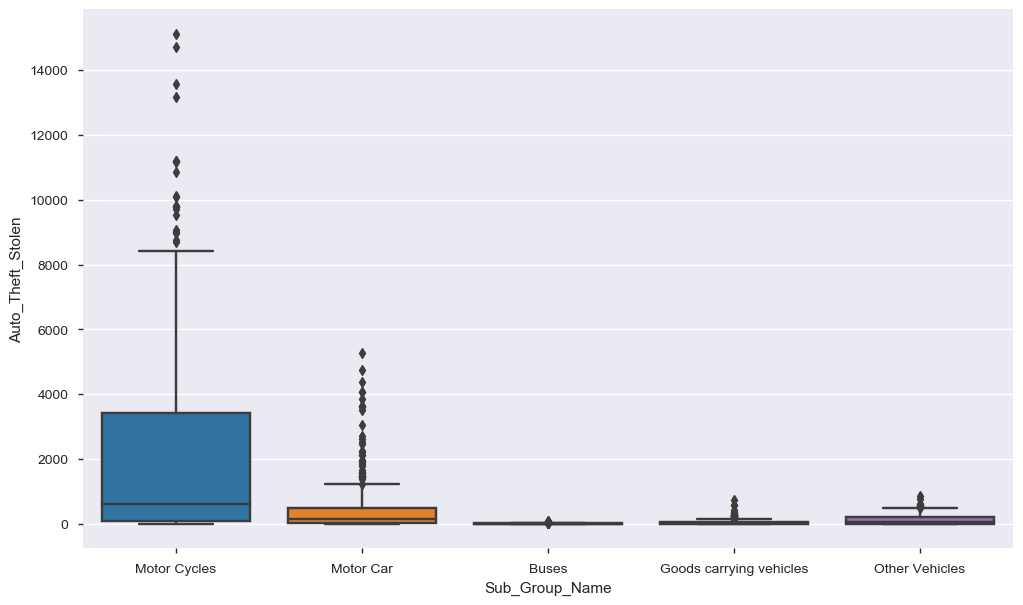

In [22]:
plt.figure(figsize=[12,7])
sns.boxplot(df.Sub_Group_Name,df.Auto_Theft_Stolen)

### Top 5 states where number of vehicles are highest:
1. Maharashtra
2. Delhi
3. Uttar Pradesh
4. Gujarat
5. Madhya Pradesh

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

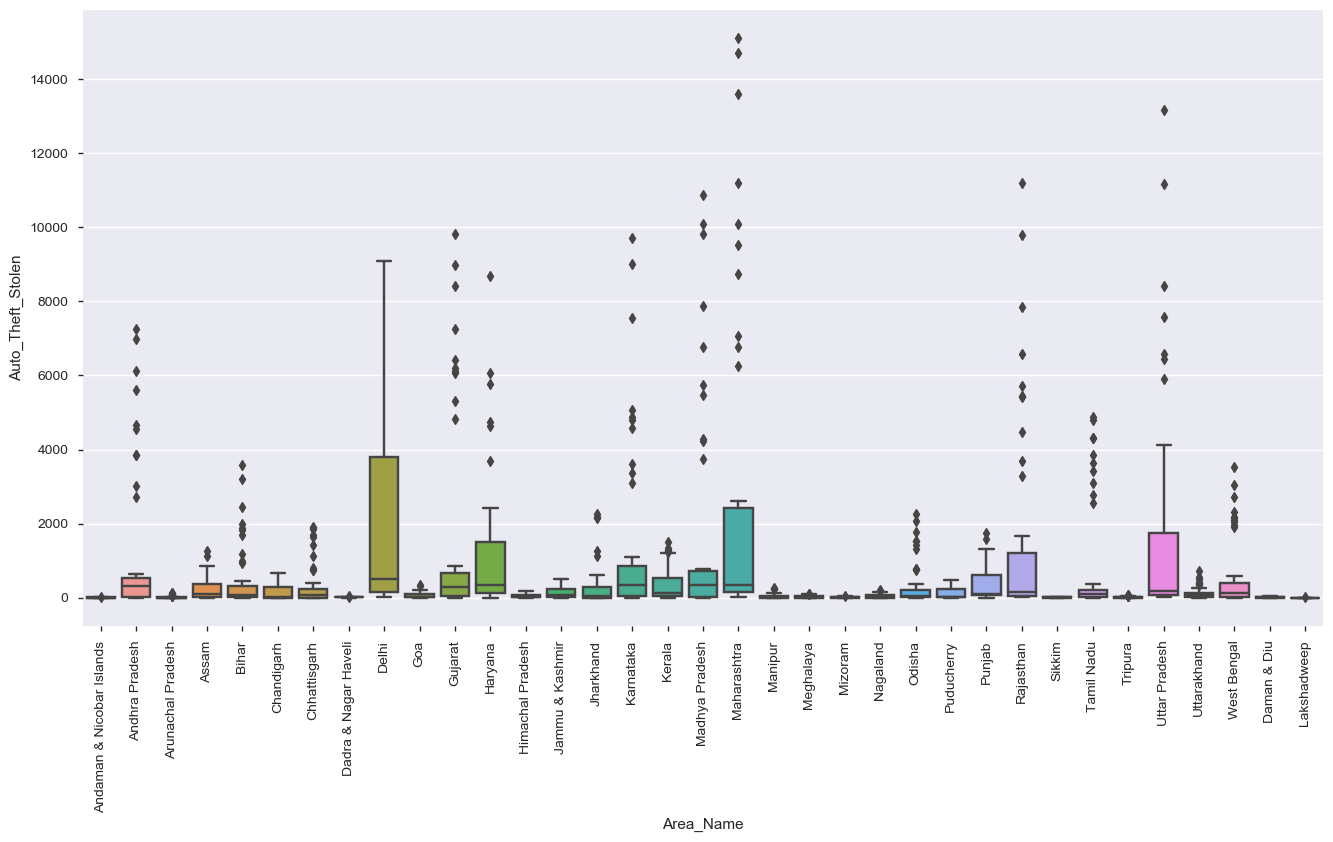

In [23]:
plt.figure(figsize=[16,8])
sns.boxplot(df.Area_Name,df.Auto_Theft_Stolen)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

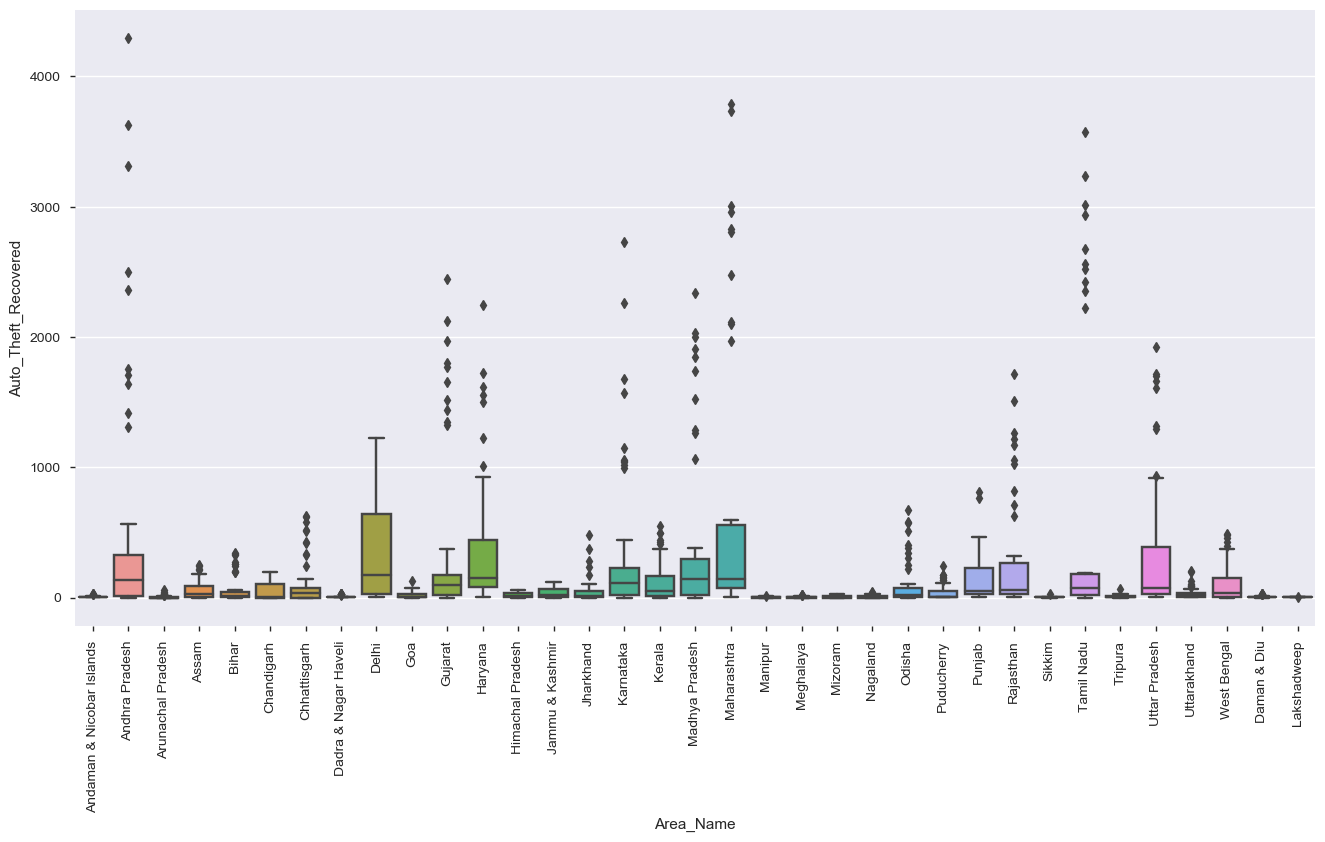

In [24]:
plt.figure(figsize=[16,8])
sns.boxplot(df.Area_Name,df.Auto_Theft_Recovered)
plt.xticks(rotation=90)

In [25]:
df.groupby('Area_Name')['Auto_Theft_Stolen'].agg([min,max,sum]).sort_values(by='sum',ascending=False)

,min,max,sum
Area_Name,,,
Maharashtra,10,15126,131282
Delhi,5,9085,98665
Uttar Pradesh,10,13168,91558
Gujarat,1,9821,79198
Madhya Pradesh,0,10870,77690
Rajasthan,5,11199,75861
Karnataka,1,9724,67127
Haryana,2,8687,59463
Andhra Pradesh,0,7244,56809


In [26]:
df.groupby('Area_Name')['Auto_Theft_Recovered'].agg([min,max,sum]).sort_values(by='sum',ascending=False)

,min,max,sum
Area_Name,,,
Maharashtra,3.0,3791.0,35149.0
Tamil Nadu,0.0,3571.0,30053.0
Andhra Pradesh,0.0,4298.0,28581.0
Madhya Pradesh,0.0,2339.0,20538.0
Gujarat,0.0,2445.0,20393.0
Haryana,2.0,2248.0,20284.0
Uttar Pradesh,5.0,1921.0,18639.0
Delhi,1.0,1225.0,18574.0
Karnataka,0.0,2732.0,18314.0


### We can seea trend that with each passing year no of stolen vehicles increases.

**Vehicle thefts increased every year, but it was maximum in 2008 with 21% and lowest in 2003 with 2.7% increase.**

In [27]:
df.groupby('Year')['Auto_Theft_Stolen'].agg([min,max,sum]).sort_values(by='sum',ascending=False)

,min,max,sum
Year,,,
2010,0,15126,145694
2009,0,14723,138600
2008,0,13589,119667
2007,0,11189,98930
2006,0,10104,91100
2005,0,9518,84675
2004,0,8748,81373
2003,0,7078,69488
2002,0,6777,67647


In [28]:
df.groupby('Year')['Auto_Theft_Stolen'].agg([sum]).pct_change()*100

,sum
Year,
2001,NaN
2002,7.767918
2003,2.721481
2004,17.103673
2005,4.057857
2006,7.587836
2007,8.594951
2008,20.961286
2009,15.821404


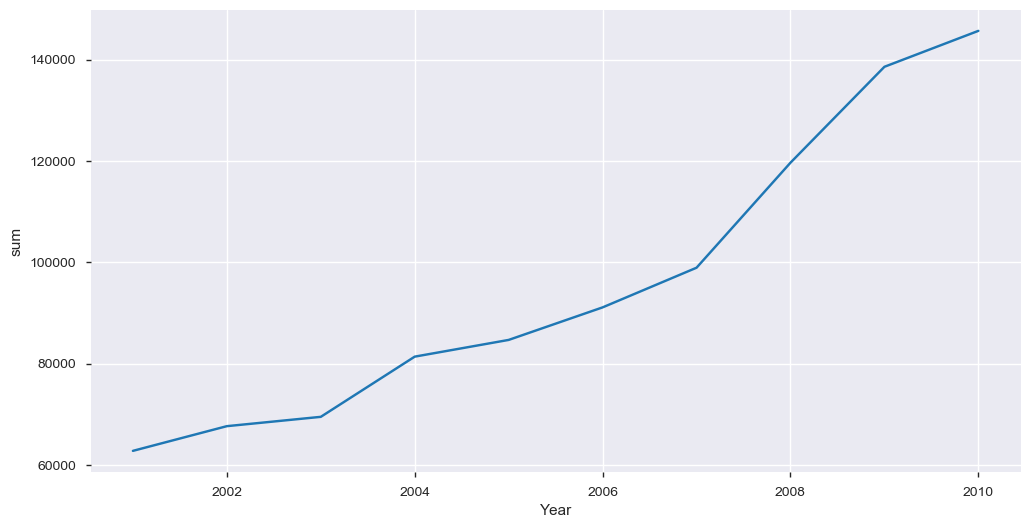

In [29]:
result=df.groupby('Year')['Auto_Theft_Stolen'].agg([sum]).sort_values(by='sum',ascending=False)
result= result.reset_index()
plt.figure(figsize=[12,6])
sns.lineplot(result.Year,result['sum'])

In [30]:
df_ana = df[['Year','Auto_Theft_Recovered','Auto_Theft_Stolen']]
df_ana.groupby('Year').agg([sum])

,Auto_Theft_Recovered,Auto_Theft_Stolen
,sum,sum
Year,,
2001,20852.0,62771
2002,22059.0,67647
2003,22897.0,69488
2004,25451.0,81373
2005,25005.0,84675
2006,26503.0,91100
2007,28213.0,98930
2008,29529.0,119667


### Handling Missing Values

In [31]:
df.isnull().sum()

Area_Name                        0
Year                             0
Sub_Group_Name                   0
Auto_Theft_Coordinated/Traced    0
Auto_Theft_Recovered             0
Auto_Theft_Stolen                0
dtype: int64

In [32]:
#We will impute null values in Auto_Theft_Coordinated/Traced column with median
df['Auto_Theft_Coordinated/Traced'].fillna(df['Auto_Theft_Coordinated/Traced'].median(),inplace=True)

In [33]:
df.Auto_Theft_Recovered.fillna(df.Auto_Theft_Recovered.median(),inplace=True)

In [34]:
df.groupby('Area_Name')['Auto_Theft_Coordinated/Traced'].agg([max,sum]).sort_values(by='sum',ascending=False)

,max,sum
Area_Name,,
Tamil Nadu,2800.0,18592.0
Maharashtra,1083.0,9293.0
Gujarat,918.0,5865.0
Punjab,426.0,4178.0
Rajasthan,791.0,3004.0
Delhi,438.0,2849.0
Andhra Pradesh,659.0,2393.0
Karnataka,313.0,2085.0
Haryana,513.0,1867.0


In [35]:
df.groupby('Sub_Group_Name')['Auto_Theft_Coordinated/Traced'].agg([max,sum]).sort_values(by='sum',ascending=False)

,max,sum
Sub_Group_Name,,
Motor Cycles,2800.0,44616.0
Motor Car,466.0,7925.0
Other Vehicles,184.0,2941.0
Goods carrying vehicles,73.0,1490.0
Buses,8.0,200.0


In [36]:
pd.pivot_table(df,values='Auto_Theft_Stolen',index='Area_Name',columns='Sub_Group_Name',aggfunc={'Auto_Theft_Stolen':np.sum},margins=True,margins_name=' Grand Total')

Sub_Group_Name,Buses,Goods carrying vehicles,Motor Car,Motor Cycles,Other Vehicles,Grand Total
Area_Name,,,,,,
Andaman & Nicobar Islands,1.0,NaN,2.0,75.0,5.0,83
Andhra Pradesh,126.0,298.0,3696.0,48654.0,4035.0,56809
Arunachal Pradesh,0.0,0.0,74.0,754.0,1.0,829
Assam,43.0,436.0,2470.0,6356.0,1813.0,11118
Bihar,5.0,121.0,1549.0,19728.0,1474.0,22877
Chandigarh,4.0,58.0,3028.0,4296.0,35.0,7421
Chhattisgarh,28.0,13.0,1441.0,13820.0,1353.0,16655
Dadra & Nagar Haveli,NaN,20.0,41.0,151.0,11.0,223
Daman & Diu,0.0,3.0,44.0,203.0,5.0,255


In [37]:
df.isnull().sum()

Area_Name                        0
Year                             0
Sub_Group_Name                   0
Auto_Theft_Coordinated/Traced    0
Auto_Theft_Recovered             0
Auto_Theft_Stolen                0
dtype: int64

In [38]:
East_Zone=['Odisha','West Bengal','Bihar','Jharkhand']
North_East_Zone=['Arunachal Pradesh','Tripura','Sikkim','Manipur','Mizoram','Assam','Meghalaya','Nagaland']
North_Zone=['Himachal Pradesh','Uttarakhand','Jammu & Kashmir','Haryana','Punjab','Uttar Pradesh','Delhi']
Central_Zone=['Madhya Pradesh','Chhattisgarh']
West_Zone=['Maharashtra','Rajasthan','Gujarat','Goa']
South_Zone = ['Tamil Nadu','Andhra Pradesh','Kerala','Karnataka']
Union_Territories=['Lakshadweep','Andaman & Nicobar Islands','Daman & Diu','Puducherry','Dadra & Nagar Haveli','Chandigarh']

In [39]:
df.Area_Name.replace(East_Zone,'East Zone',inplace=True)

In [40]:
df.Area_Name.replace(North_East_Zone,'North-East Zone',inplace=True)

In [41]:
df.Area_Name.replace(North_Zone,'North Zone',inplace=True)

In [42]:
df.Area_Name.replace(Central_Zone,'Central Zone',inplace=True)

In [43]:
df.Area_Name.replace(West_Zone,'West Zone',inplace=True)

In [44]:
df.Area_Name.replace(South_Zone,'South Zone',inplace=True)

In [45]:
df.Area_Name.replace(Union_Territories,'Union Territories',inplace=True)

In [46]:
df.Area_Name = df.Area_Name.astype('category')

In [47]:
df.Area_Name.value_counts()

North Zone           340
North-East Zone      339
South Zone           199
East Zone            194
West Zone            188
Union Territories    166
Central Zone          95
Name: Area_Name, dtype: int64

## Based on the box plot its evident that maximum theft of vehicles is in west zone followed by North Zone. Its least in Union Territories.

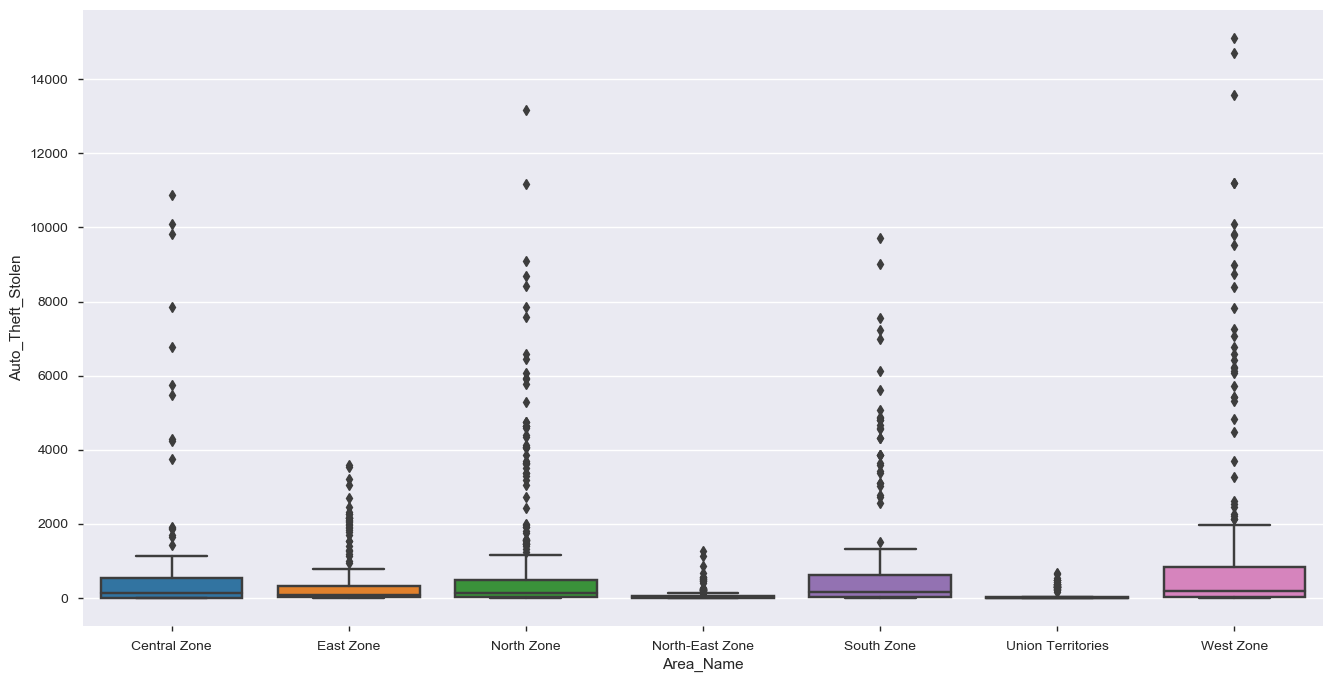

In [48]:
plt.figure(figsize=[16,8])
sns.boxplot(df.Area_Name,df.Auto_Theft_Stolen)

## But based on the box plot its evident that maximum recovered vehicles is in South Zone followed by West Zone. Its least in Union Territories.

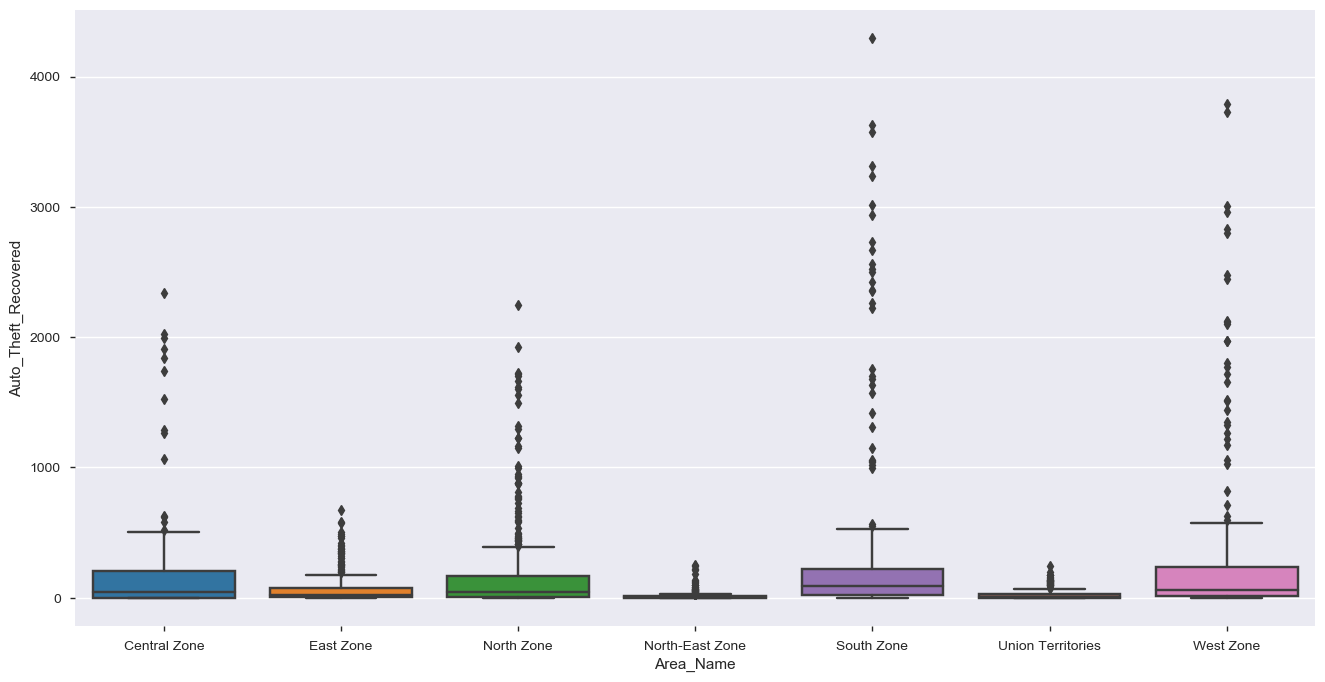

In [49]:
plt.figure(figsize=[16,8])
sns.boxplot(df.Area_Name,df.Auto_Theft_Recovered)

## Based on the box plot its evident that maximum traced vehicles is in South Zone followed by West Zone. But, its least in North East Zone.

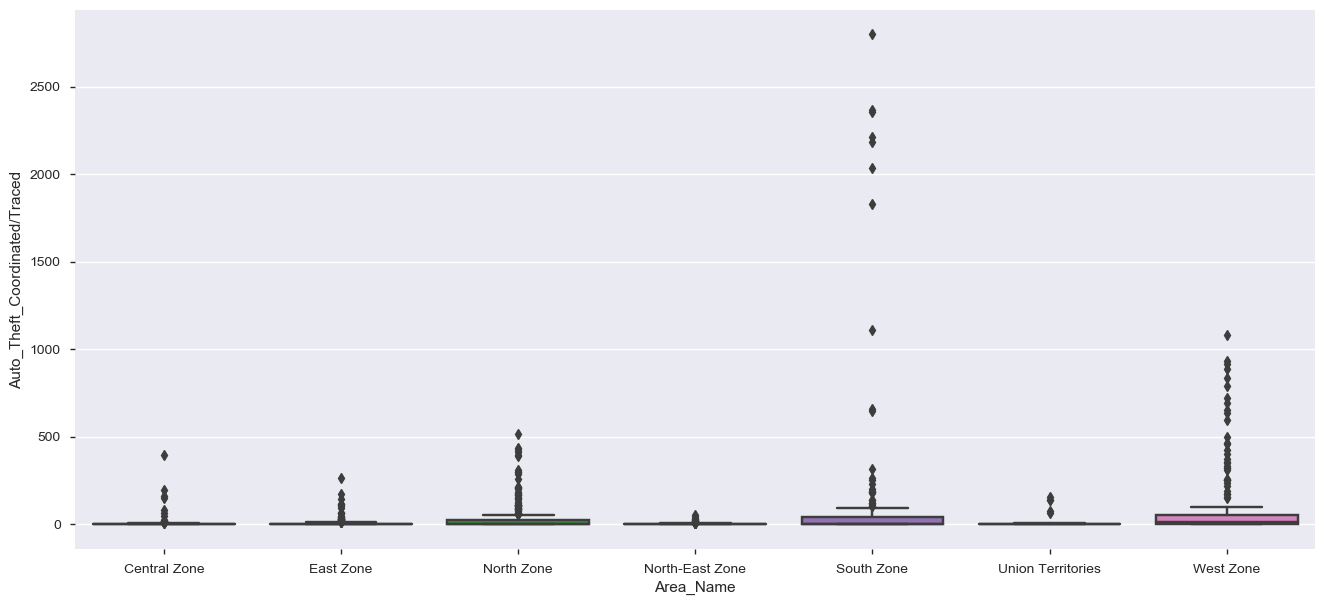

In [50]:
plt.figure(figsize=[16,7])
sns.boxplot(df.Area_Name,df['Auto_Theft_Coordinated/Traced'])

In [51]:
pd.crosstab(df.Sub_Group_Name,df.Area_Name,margins=True,margins_name=' Grand Total')

Area_Name,Central Zone,East Zone,North Zone,North-East Zone,South Zone,Union Territories,West Zone,Grand Total
Sub_Group_Name,,,,,,,,
Buses,17,36,62,54,39,13,33,254
Goods carrying vehicles,18,38,69,62,40,25,40,292
Motor Car,20,40,70,79,40,42,40,331
Motor Cycles,20,40,70,77,40,54,40,341
Other Vehicles,20,40,69,67,40,32,35,303
Grand Total,95,194,340,339,199,166,188,1521


**Motor Cycles are the most used transportation medium across all zones. Its most used in North-East Zone and least used in Central Zone.**

## Model Building

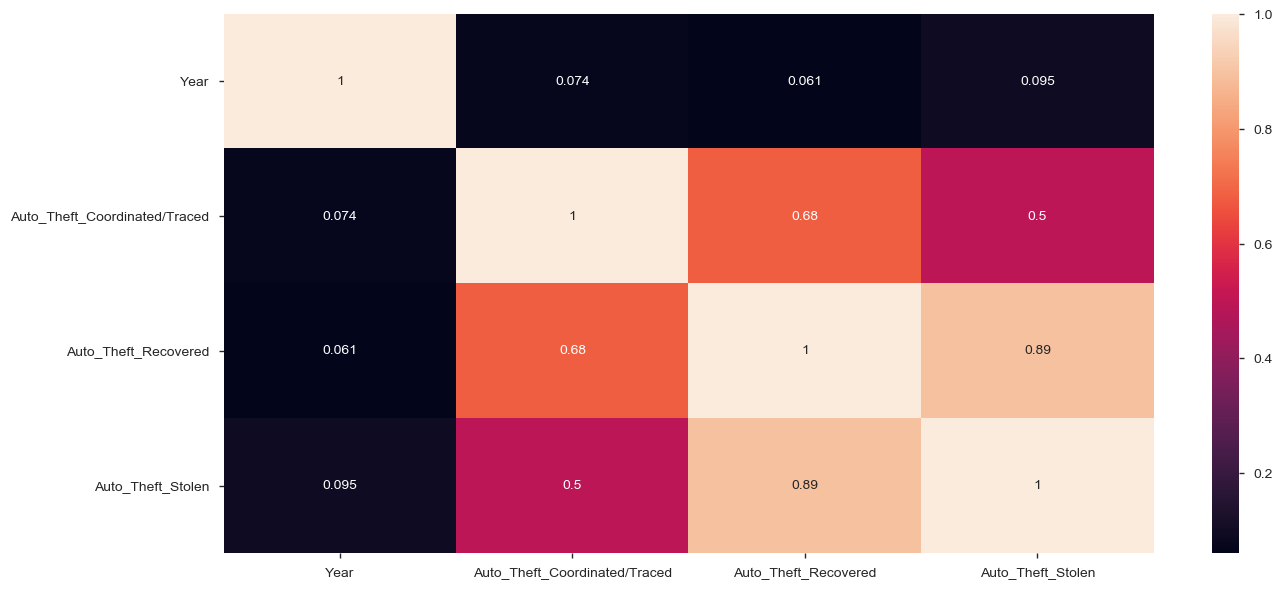

In [52]:
# Before going for model we will see the correlation.
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(),annot=True)

In [53]:
dummy_x = pd.get_dummies(df)
X = dummy_x.drop(['Year','Auto_Theft_Recovered'],axis=1)
y = df.Auto_Theft_Recovered

In [54]:
X.head()

,Auto_Theft_Coordinated/Traced,Auto_Theft_Stolen,Area_Name_Central Zone,Area_Name_East Zone,Area_Name_North Zone,Area_Name_North-East Zone,Area_Name_South Zone,Area_Name_Union Territories,Area_Name_West Zone,Sub_Group_Name_Buses,Sub_Group_Name_Goods carrying vehicles,Sub_Group_Name_Motor Car,Sub_Group_Name_Motor Cycles,Sub_Group_Name_Other Vehicles
0,2.0,4,0,0,0,0,0,1,0,0,0,0,1,0
1,136.0,2725,0,0,0,0,1,0,0,0,0,0,1,0
2,0.0,27,0,0,0,1,0,0,0,0,0,0,1,0
3,0.0,205,0,0,0,1,0,0,0,0,0,0,1,0
4,44.0,946,0,1,0,0,0,0,0,0,0,0,1,0


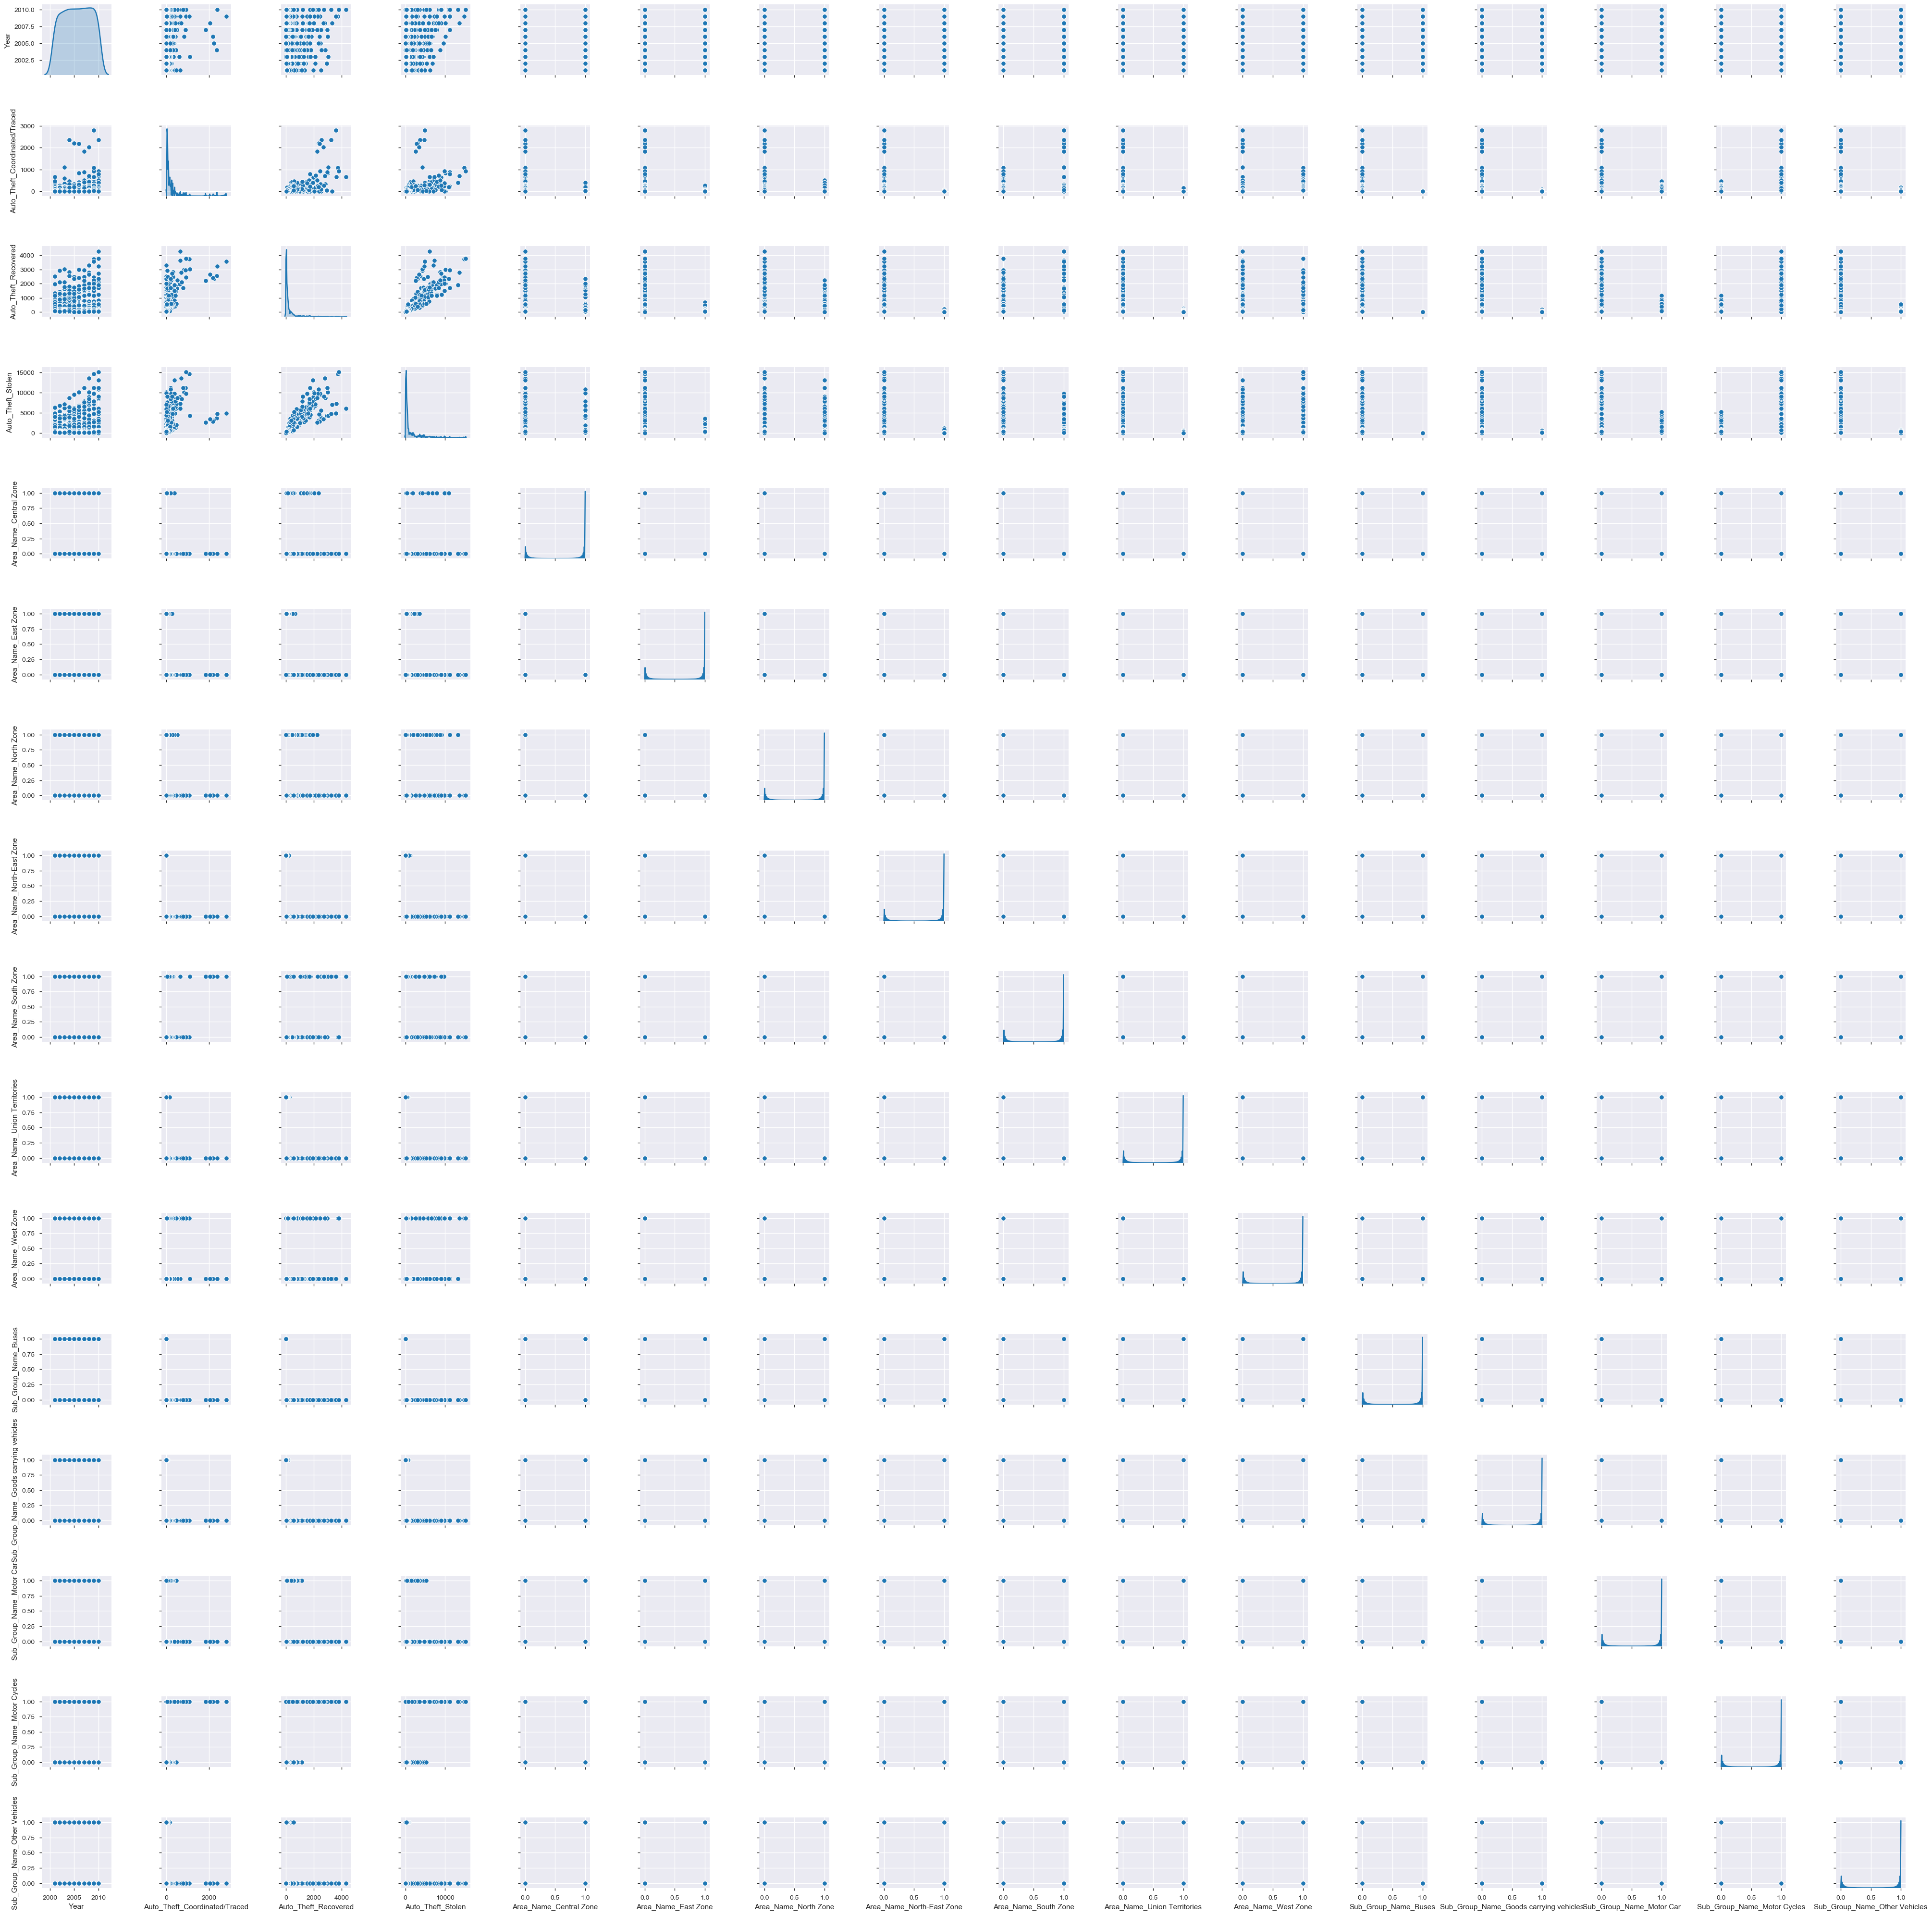

In [55]:
sns.pairplot(dummy_x,diag_kind='kde')

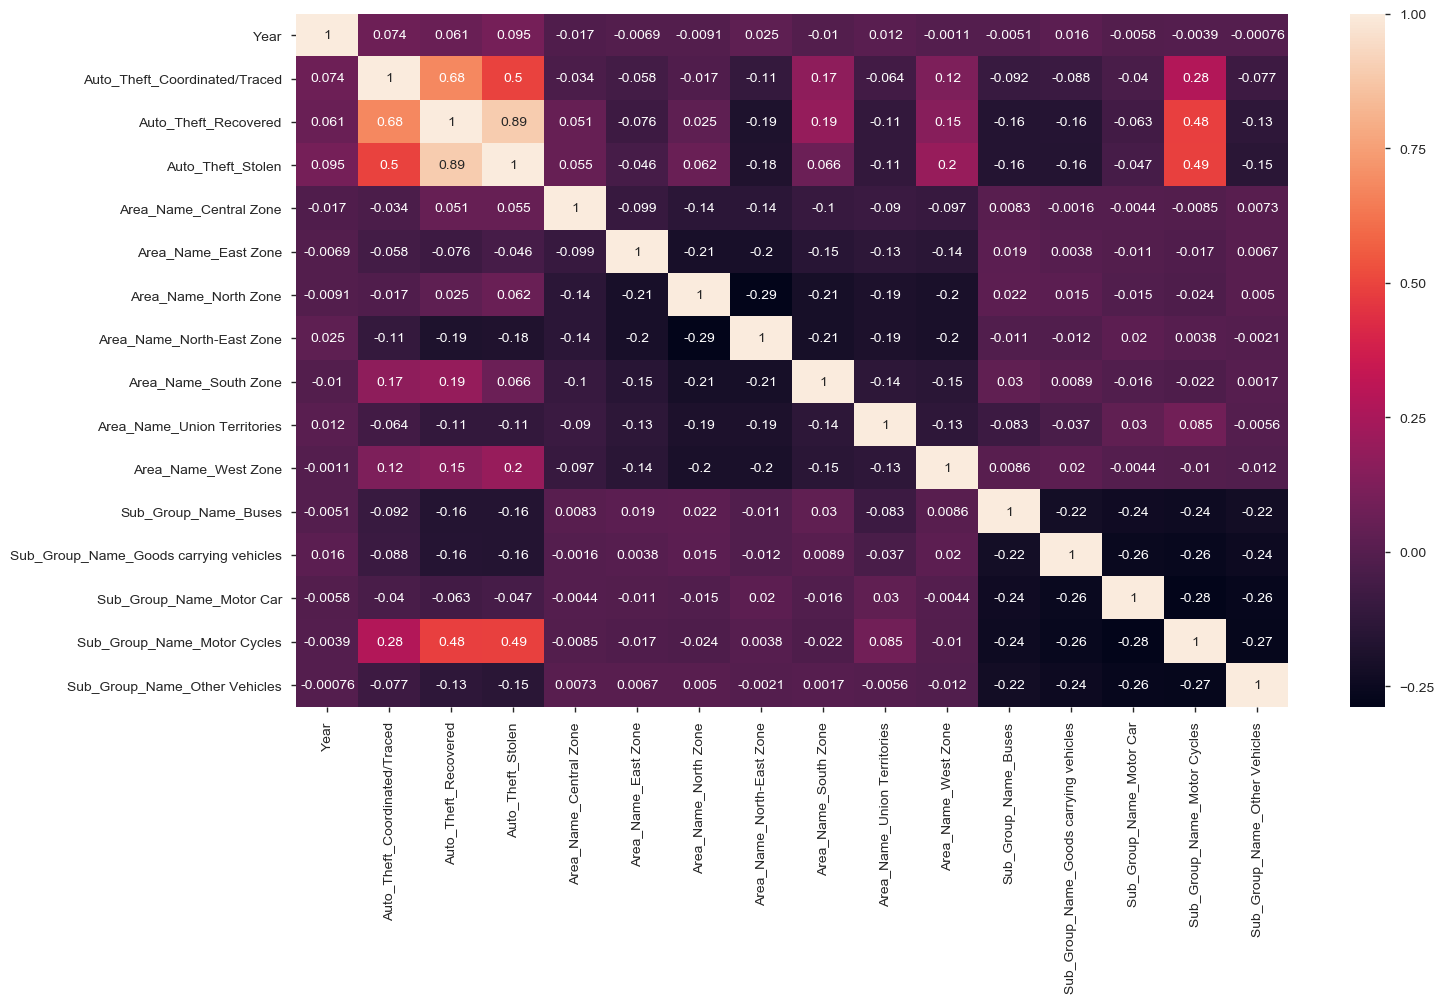

In [56]:
plt.figure(figsize=[16,9])
sns.heatmap(dummy_x.corr(),annot=True)

In [0]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [0]:
Xcluster  = dummy_x.apply(zscore)

In [0]:
error = []
k = np.arange(1,18)
for i in range(1,18):
    kmean = KMeans(n_clusters=i)
    kmean.fit(Xcluster)
    error.append(kmean.inertia_)

Text(0, 0.5, 'Cluster Errors')

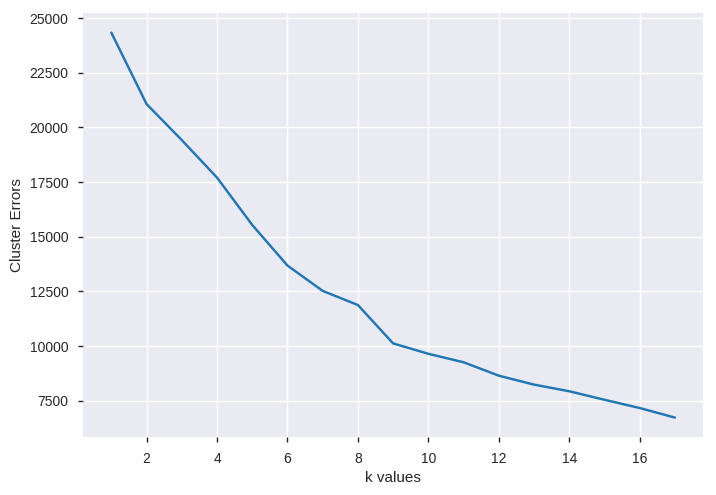

In [57]:
plt.plot(k,error)
plt.xlabel("k values")
plt.ylabel("Cluster Errors")

In [58]:
kmean = KMeans(n_clusters=8)
kmean.fit(Xcluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**From the above plot we can see that k = 8**

In [59]:
df_labels = pd.DataFrame(kmean.labels_,columns=list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
Auto_labeled = dummy_x.join(df_labels)
Auto_labeled.head()

,Year,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen,Area_Name_Central Zone,Area_Name_East Zone,Area_Name_North Zone,Area_Name_North-East Zone,Area_Name_South Zone,Area_Name_Union Territories,Area_Name_West Zone,Sub_Group_Name_Buses,Sub_Group_Name_Goods carrying vehicles,Sub_Group_Name_Motor Car,Sub_Group_Name_Motor Cycles,Sub_Group_Name_Other Vehicles,labels
0,2001,1.0,4.0,4,0,0,0,0,0,1,0,0,0,0,1,0,6
1,2001,136.0,1311.0,2725,0,0,0,0,1,0,0,0,0,0,1,0,3
2,2001,0.0,21.0,27,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2001,0.0,94.0,205,0,0,0,1,0,0,0,0,0,0,1,0,0
4,2001,44.0,205.0,946,0,1,0,0,0,0,0,0,0,0,1,0,4


In [60]:
Auto_labeled.labels.value_counts()

1    378
0    277
4    194
3    177
7    171
6    166
5     90
2     68
Name: labels, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [61]:
sc = StandardScaler()
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state = 123)
scaled= sc.fit(xtrain)
scaled_train = pd.DataFrame(scaled.transform(xtrain),columns=xtrain.columns)
scaled_test = pd.DataFrame(scaled.transform(xtest),columns=xtest.columns)

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor

In [63]:
models=[]
models.append(('Decision Tree Regressor',DecisionTreeRegressor()))
models.append(('Linear Regression',LinearRegression()))
models.append(('Lasso Regression',Lasso()))
models.append(('Ridge Regression',Ridge()))
models.append(('Gradient Boosting Regressor',GradientBoostingRegressor()))
models.append(('Random Forest Regressor',RandomForestRegressor()))
models.append(('Ada Boost Regressor',AdaBoostRegressor()))


In [64]:
for name, model in models:
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    print("R2 Score of",name,metrics.r2_score(ytest,pred))

R2 Score of Decision Tree Regressor 0.8218741173572623
R2 Score of Linear Regression 0.8389746276979214
R2 Score of Lasso Regression 0.8387085951645539
R2 Score of Ridge Regression 0.8389488745597962
R2 Score of Gradient Boosting Regressor 0.8929044607191406
R2 Score of Random Forest Regressor 0.8765904385050637
R2 Score of Ada Boost Regressor 0.8320067776745678


In [65]:
for name, model in models:
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    print("Root mean squared error of",name,np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root mean squared error of Decision Tree Regressor 194.9959593434988
Root mean squared error of Linear Regression 230.5882955943925
Root mean squared error of Lasso Regression 230.7786962487519
Root mean squared error of Ridge Regression 230.60673410108996
Root mean squared error of Gradient Boosting Regressor 188.05106367751333
Root mean squared error of Random Forest Regressor 202.8240989462371
Root mean squared error of Ada Boost Regressor 234.69809868040178


## Hyper-parameter Tuning of Gradient Boosting Regressor

In [66]:
parameters = {'max_depth':[2,3,4,5,6],'min_samples_split':[2,3,4,5,6,7,8,9,10], 'min_samples_leaf':[2,3,4,5,6,7,8,9],
             'learning_rate':[0.1,0.07,0.05,0.03,0.01,0.005], 'n_estimators':[30,50,70,90,120,180],'alpha':[0.1,0.3,0.5,0.7,0.9]}

In [67]:
from sklearn.model_selection import RandomizedSearchCV,KFold

In [0]:
kfold  = KFold(n_splits=10,random_state=100)
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=parameters,scoring='neg_mean_squared_error',cv=kfold)
rscv.fit(scaled_train,ytrain)

In [0]:
rscv.best_estimator_

In [68]:
GBoost = GradientBoostingRegressor(alpha=0.1,learning_rate=0.1, max_depth=3,min_samples_leaf=4, min_samples_split=9,n_estimators=50)
model_gb=GBoost.fit(scaled_train,ytrain)
pred_boost = GBoost.predict(scaled_test)
pred_boost_train = GBoost.predict(scaled_train)
print("Test R2 score of Gradient Boosting Regressor:",metrics.r2_score(ytest,pred_boost))
print("Train R2 score of Gradient Boosting Regressor:",metrics.r2_score(ytrain,pred_boost_train))
print("RMSE of Test data forGradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(ytest,pred_boost)))
print("RMSE of Train data for Gradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(ytrain,pred_boost_train)))

Test R2 score of Gradient Boosting Regressor: 0.9085285616318138
Train R2 score of Gradient Boosting Regressor: 0.9689266755727425
RMSE of Test data forGradient Boosting Regressor: 173.79323104513014
RMSE of Train data for Gradient Boosting Regressor: 80.41687854382279


In [69]:
imp = pd.DataFrame({"Feature":scaled_train.columns,"Importance":model_gb.feature_importances_})
imp

,Feature,Importance
0,Auto_Theft_Coordinated/Traced,0.122923
1,Auto_Theft_Stolen,0.843899
2,Area_Name_Central Zone,0.000342
3,Area_Name_East Zone,0.001775
4,Area_Name_North Zone,0.008455
5,Area_Name_North-East Zone,0.000000
6,Area_Name_South Zone,0.019274
7,Area_Name_Union Territories,0.000000
8,Area_Name_West Zone,0.000000
9,Sub_Group_Name_Buses,0.000000


## Statsmodel Building

In [70]:
import statsmodels.api as sm
X_ = sm.add_constant(X)
model = sm.OLS(y,X_).fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Auto_Theft_Recovered   R-squared:                       0.887
Model:                              OLS   Adj. R-squared:                  0.886
Method:                   Least Squares   F-statistic:                     982.7
Date:                  Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                          11:47:53   Log-Likelihood:                -9900.3
No. Observations:                  1521   AIC:                         1.983e+04
Df Residuals:                      1508   BIC:                         1.990e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     20.8176      3.674      5.666      0.000      13.610      28.025
Auto_Theft_Coordinated/Traced              0.8027      0.027     29.431      0.000       0.749       0.856
Auto_Theft_Stolen                          0.1998      0.003     60.791      0.000       0.193       0.206
Area_Name_Central Zone                    39.8355     15.089      2.640      0.008      10.237      69.434
Area_Name_East Zone                      -34.5066     10.909     -3.163      0.002     -55.905     -13.108
Area_Name_North Zone                     -13.9132      8.690     -1.601      0.110     -30.959       3.133
Area_Name_North-East Zone                -25.9293      8.834     -2.935      0.003     -43.258      -8.601
Area_Name_South Zone                     113.9874     10.994     10.368      0.000      92.422     135.553
Area_Name_Union Territories              -25.4892     11.984     -2.127      0.034     -48.996      -1.983
Area_Name_West Zone                      -33.1668     11.419     -2.905      0.004     -55.565     -10.769
Sub_Group_Name_Buses                     -19.1961      9.237     -2.078      0.038     -37.315      -1.077
Sub_Group_Name_Goods carrying vehicles   -11.8932      8.665     -1.372      0.170     -28.891       5.104
Sub_Group_Name_Motor Car                  -7.8394      8.127     -0.965      0.335     -23.780       8.102
Sub_Group_Name_Motor Cycles               56.8198      9.682      5.869      0.000      37.828      75.812
Sub_Group_Name_Other Vehicles              2.9265      8.477      0.345      0.730     -13.701      19.554
==============================================================================
Omnibus:                     1648.897   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           295334.733
Skew:                           4.955   Prob(JB):                         0.00
Kurtosis:                      70.542   Cond. No.                     1.08e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
Xnew= X.drop(['Area_Name_North Zone','Sub_Group_Name_Goods carrying vehicles','Sub_Group_Name_Motor Car','Sub_Group_Name_Other Vehicles'],axis=1)
Xnew_ = sm.add_constant(Xnew)
model1=sm.OLS(y,Xnew_).fit()

In [73]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Auto_Theft_Recovered   R-squared:                       0.887
Model:                              OLS   Adj. R-squared:                  0.886
Method:                   Least Squares   F-statistic:                     1180.
Date:                  Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                          11:47:58   Log-Likelihood:                -9900.9
No. Observations:                  1521   AIC:                         1.982e+04
Df Residuals:                      1510   BIC:                         1.988e+04
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.3090      9.561      0.137      0.891     -17.444      20.062
Auto_Theft_Coordinated/Traced     0.8028      0.027     29.443      0.000       0.749       0.856
Auto_Theft_Stolen                 0.1998      0.003     61.175      0.000       0.193       0.206
Area_Name_Central Zone           53.8942     18.943      2.845      0.005      16.736      91.052
Area_Name_East Zone             -20.5292     14.723     -1.394      0.163     -49.409       8.350
Area_Name_North-East Zone       -12.0118     12.764     -0.941      0.347     -37.048      13.025
Area_Name_South Zone            127.8981     14.727      8.685      0.000      99.010     156.786
Area_Name_Union Territories     -11.4571     15.819     -0.724      0.469     -42.487      19.573
Area_Name_West Zone             -19.4651     14.990     -1.299      0.194     -48.869       9.939
Sub_Group_Name_Buses            -13.5987     11.612     -1.171      0.242     -36.377       9.179
Sub_Group_Name_Motor Cycles      62.4416     12.006      5.201      0.000      38.891      85.992
==============================================================================
Omnibus:                     1647.846   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           294387.981
Skew:                           4.951   Prob(JB):                         0.00
Kurtosis:                      70.432   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
newX= Xnew.drop(["Area_Name_East Zone","Area_Name_North-East Zone","Area_Name_Union Territories","Area_Name_West Zone","Sub_Group_Name_Buses"],axis=1)
newX_ = sm.add_constant(newX)
model2=sm.OLS(y,newX_).fit()

In [75]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Auto_Theft_Recovered   R-squared:                       0.886
Model:                              OLS   Adj. R-squared:                  0.886
Method:                   Least Squares   F-statistic:                     2360.
Date:                  Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                          11:47:59   Log-Likelihood:                -9903.0
No. Observations:                  1521   AIC:                         1.982e+04
Df Residuals:                      1515   BIC:                         1.985e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -12.6527      5.199     -2.434      0.015     -22.851      -2.455
Auto_Theft_Coordinated/Traced     0.8018      0.027     29.473      0.000       0.748       0.855
Auto_Theft_Stolen                 0.2000      0.003     64.363      0.000       0.194       0.206
Area_Name_Central Zone           64.6835     17.437      3.710      0.000      30.480      98.887
Area_Name_South Zone            138.6061     12.679     10.932      0.000     113.736     163.476
Sub_Group_Name_Motor Cycles      64.9312     11.531      5.631      0.000      42.312      87.550
==============================================================================
Omnibus:                     1644.862   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291017.498
Skew:                           4.938   Prob(JB):                         0.00
Kurtosis:                      70.041   Cond. No.                     7.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Building using PCA

In [76]:
from sklearn.decomposition import PCA

In [78]:
pca=PCA(0.97)
pca.fit(scaled_train)
dr_train=pca.transform(scaled_train)
dr_test = pca.transform(scaled_test)

In [80]:
pca.n_components_

11

In [0]:
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=parameters,scoring='neg_mean_squared_error',cv=kfold)
rscv.fit(dr_train,ytrain)

In [0]:
rscv.best_estimator_

In [81]:
GBoost = GradientBoostingRegressor( max_depth=3,min_samples_leaf=4, min_samples_split=7,n_estimators=120,alpha=0.1,learning_rate=0.07)
GBoost.fit(dr_train,ytrain)
pred_boostpca = GBoost.predict(dr_test)
pred_boost_trainpca = GBoost.predict(dr_train)
print("Test R2 score of Gradient Boosting Regressor:",metrics.r2_score(ytest,pred_boostpca))
print("Train R2 score of Gradient Boosting Regressor:",metrics.r2_score(ytrain,pred_boost_trainpca))
print("RMSE of Test data forGradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(ytest,pred_boostpca)))
print("RMSE of Train data for Gradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(ytrain,pred_boost_trainpca)))

Test R2 score of Gradient Boosting Regressor: 0.9142703581051025
Train R2 score of Gradient Boosting Regressor: 0.9790932490249714
RMSE of Test data forGradient Boosting Regressor: 168.25020732347969
RMSE of Train data for Gradient Boosting Regressor: 65.96242676273279


In [82]:
pca1=PCA(n_components=5)
pca1.fit(scaled_train)
dr_train1=pca1.transform(scaled_train)
dr_test1 = pca1.transform(scaled_test)
pca1.explained_variance_ratio_

array([0.15145672, 0.09617623, 0.09099307, 0.08978759, 0.08762674])

In [0]:
kfold  = KFold(n_splits=10,random_state=100)
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=parameters,scoring='neg_mean_squared_error',cv=kfold)
rscv.fit(dr_train1,ytrain)

In [0]:
rscv.best_estimator_

In [83]:
GBoost1 = GradientBoostingRegressor( max_depth=3,min_samples_leaf=4, min_samples_split=4,n_estimators=180,alpha=0.5,learning_rate=0.05)
GBoost1.fit(dr_train1,ytrain)
pred_boostpca1 = GBoost1.predict(dr_test1)
pred_boost_trainpca1 = GBoost1.predict(dr_train1)
print("Test R2 score of Gradient Boosting Regressor:",metrics.r2_score(ytest,pred_boostpca1))
print("Train R2 score of Gradient Boosting Regressor:",metrics.r2_score(ytrain,pred_boost_trainpca1))
print("RMSE of Test data forGradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(ytest,pred_boostpca1)))
print("RMSE of Train data for Gradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(ytrain,pred_boost_trainpca1)))

Test R2 score of Gradient Boosting Regressor: 0.8848257619075207
Train R2 score of Gradient Boosting Regressor: 0.973547772629109
RMSE of Test data forGradient Boosting Regressor: 195.01489217448423
RMSE of Train data for Gradient Boosting Regressor: 74.19668043855937


In [84]:
results = pd.DataFrame({'Actual':ytest,'Predicted':pred_boostpca})

In [85]:
results.head()

,Actual,Predicted
853,0.0,-2.111307
42,665.0,958.395718
779,24.0,22.775222
309,44.0,55.166897
1263,2.0,10.449095


<Figure size 1400x700 with 0 Axes>

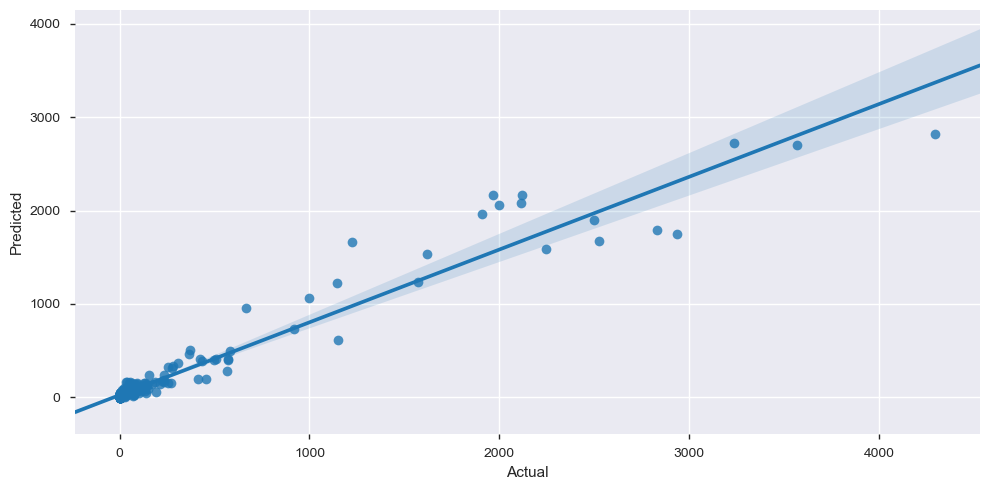

In [86]:
plt.figure(figsize=[14,7])
sns.lmplot(x='Actual',y='Predicted',data=results,height=5,aspect=2)

## Evaluating the final statsmodels

In [0]:
sc = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(newX,y,test_size=0.2,random_state = 123)
sca= sc.fit(x_train)
new_train = pd.DataFrame(sca.transform(x_train),columns=newX.columns)
new_test = pd.DataFrame(sca.transform(x_test),columns=newX.columns)

In [77]:
GBoost2 = GradientBoostingRegressor( )
GBoost2.fit(x_train,ytrain)
pred_ = GBoost2.predict(x_test)
pred_boo = GBoost2.predict(x_train)
print("Test R2 score of Gradient Boosting Regressor:",metrics.r2_score(y_test,pred_))
print("Train R2 score of Gradient Boosting Regressor:",metrics.r2_score(y_train,pred_boo))
print("RMSE of Test data forGradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(y_test,pred_)))
print("RMSE of Train data for Gradient Boosting Regressor:",np.sqrt(metrics.mean_squared_error(y_train,pred_boo)))

Test R2 score of Gradient Boosting Regressor: 0.8940971765456834
Train R2 score of Gradient Boosting Regressor: 0.9846161713353365
RMSE of Test data forGradient Boosting Regressor: 187.01040938747164
RMSE of Train data for Gradient Boosting Regressor: 56.59150446528723
